The estimated price for the European options is
2.120258839809905

The estimate for the normal approach to the Asian method is: 
0.8954112748405114
The standard dev. for the normal approach to the Asian method is: 
0.05954145478830825

The estimate for the control variates approach to the Asian method is: 
0.9418924010173487
The standard dev. for the control variates approach approach to the Asian method is: 
0.002170607704502483

The estimate for the antithetic sampling approach to the Asian method is: 
0.9218422775987274
The standard dev. for the antithetic sampling approach to the Asian method is: 
0.03796702363558975

Below are the plots of the sampling distributions with their corresponding kde lines.
As can be observed, all of the estimators return similar values.
With the data from the from the variance control techniques having lower standard deviations. 


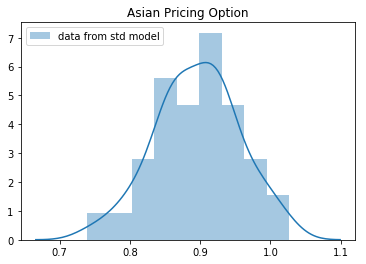

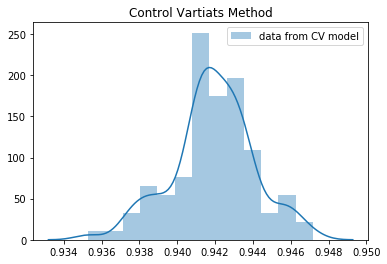

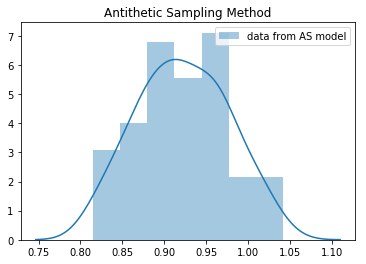

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  2 09:50:55 2020

@author: claytonfields
"""
import numpy as np
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt
import seaborn as sns
    
#Iinitial values
S0 = 50
K = 52
sigma = 0.5
T = 30
r = 0.05
n = 1000
m = 100

##Part a: European
mu_mc_e = np.zeros((m,1))
for j in range(m):
      ST = S0*np.exp((r-(sigma**2)/2)*T/365 + sigma*norm.rvs(size=1000)*np.sqrt(T/365))
      C = np.zeros((n,1))
      for i in range(n):
      	    C[i] =np.exp(-r*T/365)*max(0,ST[i] - K)
      
      mu_mc_e[j] = np.mean(C)

se_mc_e = np.std(mu_mc_e)/np.sqrt(m)    
Muhat = mu_mc_e.mean()
print("The estimated price for the European options is")
print(Muhat)
print()

# Part b: Asian standard model
theta_mc = np.zeros((m,1))
mu_mc = []

for j in range(m):
    theta = np.zeros((n,1))
    A = []
    for i in range(n):
        ST = []
        ST.append(S0)
        for k in range(1,T):
            ST.append(np.asscalar((ST[k-1]*np.exp((r-(sigma**2)/2)/365 + sigma*norm.rvs(size=1)/np.sqrt(365)))))
        A.append(np.exp(-r*T/365)*max(0,np.mean(ST[1:k]) - K))
        theta[i] = np.exp(-r*T/365)*max(0,np.exp(np.mean(np.log(ST[1:k]))) - K)
    mu_mc.append(np.mean(A))
    theta_mc[j]=np.mean(theta)
np.mean(A)
muhat_mc = np.mean(mu_mc)
## ANALYTIC SOLUTION (GEOMETRIC MEAN)
N = T
c3 = 1 + 1/N
c2 = sigma*((c3*T/1095)*(1 + 1/(2*N)))**.5
c1 = (1/c2)*(np.log(S0/K) + (c3*T/730)*(r - (sigma**2)/2) +
       (c3*(sigma**2)*T/1095)*(1 + 1/(2*N)))
theta0 = S0*norm.cdf(c1)*np.exp(-T*(r + c3*(sigma**2)/6)*(1 - 1/N)/730) - K*norm.cdf(c1-c2)*np.exp(-r*T/365)
mu_mc = np.array(mu_mc).reshape(-1,1)

#Part C: Control Variate
mu_cv=mu_mc-1*(theta_mc-theta0)
mu_hat_cv = np.mean(mu_cv)
mu_hat_cv_sd = np.std(mu_cv)
#Display output
print("The estimate for the normal approach to the Asian method is: ")
print(muhat_mc)
print("The standard dev. for the normal approach to the Asian method is: ")
print(np.std(mu_mc))  #STANDARD DEVIATION FOR ORDINARY APPROACH
print()
print("The estimate for the control variates approach to the Asian method is: ")
print(mu_hat_cv)
print("The standard dev. for the control variates approach approach to the Asian method is: ")
print(np.std(mu_cv)) #STANDARD DEVIATION FOR CONTROL VARIATE APPROACH

#Part D: Antithetic Sampling
mu_at = []
mu_at2 = []
n=500
for j in range(m):
    theta = np.zeros((n,1))
    A = []
    A2 = []
    for i in range(n):
        ST = []
        ST2 = []
        ST.append(S0)
        ST2.append(S0)
        for k in range(1,T+1):
#             ST[k]= ST[k-1]*np.exp(((r-(sigma**2)/2)/365) + norm.rvs(size=1)/np.sqrt(365))
            Z = norm.rvs(size=1)
            ST.append(np.asscalar((ST[k-1]*np.exp((r-(sigma**2)/2)/365 + sigma*Z/np.sqrt(365)))))
            ST2.append(np.asscalar((ST2[k-1]*np.exp((r-(sigma**2)/2)/365 + sigma*-Z/np.sqrt(365)))))
#            ST.append(ST[k-1]*np.exp(((r-(sigma**2)/2)/365) + sigma*norm.rvs(size=1)/np.sqrt(T/365)))
#            STL.append(np.log(ST[-1]))
#        A[i] = np.exp(-r*T/365)*max(0,np.mean(ST) - K)
        A.append(np.exp(-r*T/365)*max(0,np.mean(ST[1:k]) - K))
        A2.append(np.exp(-r*T/365)*max(0,np.mean(ST2[1:k]) - K))
    mu_at.append(np.asscalar(np.mean(A)))
    mu_at2.append(np.asscalar(np.mean(A2)))


#muhat_as = (np.array(mu_at)+np.array(mu_at2))/(n*m)
muhat_as = (np.mean(mu_at)+np.mean(mu_at2))/2.0

muhat_as_sd = np.std((np.array(mu_at)+np.array(mu_at2))/2)
muhat_mc_sd = np.std(mu_mc)
print()
print("The estimate for the antithetic sampling approach to the Asian method is: ")
print(muhat_as)
print("The standard dev. for the antithetic sampling approach to the Asian method is: ")
print(muhat_as_sd)
print()

##PartE
#Historgram for part A
#plt.hist(mu_mc_e)
#Asian
print("Below are the plots of the sampling distributions with their corresponding kde lines.")
print("As can be observed, all of the estimators return similar values.")
print("With the data from the from the variance control techniques having lower standard deviations. ")

sns.distplot(mu_mc,hist=True,kde=True).set(title='Asian Pricing Option')
plt.legend(['data from std model'])
#Control Variable
plt.figure()
#plt.hist(mu_cv)
sns.distplot(mu_cv,hist=True,kde=True).set(title='Control Vartiats Method')
plt.legend(['data from CV model'])
#Atnithetic
plt.figure()
#plt.hist((np.array(mu_at)+np.array(mu_at2))/2)
sns.distplot(mu_at,hist=True,kde=True).set(title='Antithetic Sampling Method')
plt.legend(['data from AS model'])


The estimate for the standard MC method is: 
98669.10838937775
The standard dev. for the standard MC method is: 
453.40213975096435
The estimate for the Rao-Blackwellized MC method is: 
98675.49666874226
The standard dev. for the Rao-Blackwellized MC method is: 
291.9771606425919

Below are the plots of the sampling distributions with their corresponding kde lines.
Observe that the data from the from the Rao-Blackwell estimator has a lower standard deviation. 



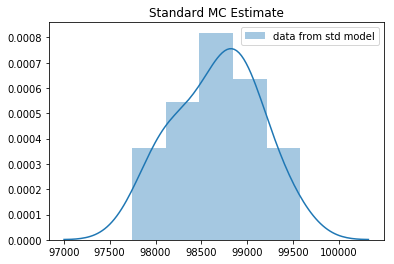

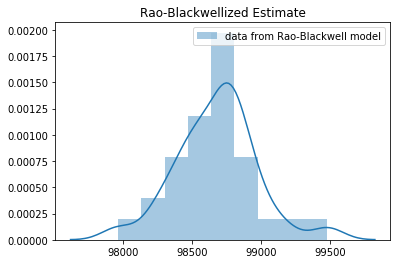

In [2]:
#Problem 2
#Simple Monte Carlo
n = 10000000
m = 30           # actual sample size n*m
ex = []# rep(0, m)   # save averages for each n-sample
for i in range(m):
  x = norm.rvs(size=n)  # it's "z" actually. use "x" to save space
  e = norm.rvs(size=n)  # it's "epsilon" actually.  use "y" to save space
  y = np.exp(9 + 3*x + e)
  x = np.exp(x)
  ex.append(np.mean(y/x))
mc = np.mean(ex)
mc_std = np.std(ex)
print("The estimate for the standard MC method is: ")
print(mc)
print("The standard dev. for the standard MC method is: ")
print(mc_std)

#Rao Blackwell
n = 10000000
m = 30           
ex2 = []
for i in range(m):
  x = norm.rvs(size=n)  # it's "z" actually. use "x" to save space
  x = np.exp(x)
  e = np.exp(.5)
  ex2.append(np.mean(e*x**2*np.exp(9)))

mc_rb = np.mean(ex2)
mc_rb_std = np.std(ex2)
print("The estimate for the Rao-Blackwellized MC method is: ")
print(mc_rb)
print("The standard dev. for the Rao-Blackwellized MC method is: ")
print(mc_rb_std)
print()
print("Below are the plots of the sampling distributions with their corresponding kde lines.")
print("Observe that the data from the from the Rao-Blackwell estimator has a lower standard deviation. ")
print()
#plt.hist(ex,bins=12)
sns.distplot(ex,hist=True,kde=True).set(title='Standard MC Estimate')
plt.legend(['data from std model'])
plt.figure()
#plt.hist(ex2,bins=12)
sns.distplot(ex2,hist=True,kde=True).set(title='Rao-Blackwellized Estimate')
plt.legend(['data from Rao-Blackwell model'])